In [3]:
import pandas as pd
import numpy as np

<module 'pandas' from '/Users/tom/miniconda3/lib/python3.7/site-packages/pandas/__init__.py'>

In [5]:
data = pd.read_csv("sesame.csv")
data

,id,site,sex,age,viewcat,setting,prebody,prelet,preform,prenumb,...,preclasf,postbody,postlet,postform,postnumb,postrelat,postclasf,peabody,encour,regular
0,1,1,1,66,1,2,16,23,12,40,...,20,18,30,14,44,14,23,62,1,0
1,2,1,2,67,3,2,30,26,9,39,...,22,30,37,17,39,14,22,8,1,1
2,3,1,1,56,3,2,22,14,9,9,...,8,21,46,15,40,9,19,32,0,1
3,4,1,1,49,1,2,23,11,10,14,...,13,21,14,13,19,8,15,27,0,0
4,5,1,1,69,4,2,32,47,15,51,...,22,32,63,18,54,14,21,71,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,5,2,51,2,1,30,15,8,12,...,10,30,33,12,45,12,20,49,1,1
236,237,5,1,49,4,1,17,16,12,15,...,15,25,26,15,20,12,11,41,1,1
237,238,5,1,43,2,1,16,13,6,11,...,9,22,19,10,10,9,7,30,1,1
238,239,5,2,60,3,1,23,16,9,33,...,16,29,35,18,50,13,23,69,1,1


In [12]:
data.age = (data.age / 12)

In [13]:
data

,id,site,sex,age,viewcat,setting,prebody,prelet,preform,prenumb,...,preclasf,postbody,postlet,postform,postnumb,postrelat,postclasf,peabody,encour,regular
0,1,1,1,5.500000,1,2,16,23,12,40,...,20,18,30,14,44,14,23,62,1,0
1,2,1,2,5.583333,3,2,30,26,9,39,...,22,30,37,17,39,14,22,8,1,1
2,3,1,1,4.666667,3,2,22,14,9,9,...,8,21,46,15,40,9,19,32,0,1
3,4,1,1,4.083333,1,2,23,11,10,14,...,13,21,14,13,19,8,15,27,0,0
4,5,1,1,5.750000,4,2,32,47,15,51,...,22,32,63,18,54,14,21,71,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,5,2,4.250000,2,1,30,15,8,12,...,10,30,33,12,45,12,20,49,1,1
236,237,5,1,4.083333,4,1,17,16,12,15,...,15,25,26,15,20,12,11,41,1,1
237,238,5,1,3.583333,2,1,16,13,6,11,...,9,22,19,10,10,9,7,30,1,1
238,239,5,2,5.000000,3,1,23,16,9,33,...,16,29,35,18,50,13,23,69,1,1


In [18]:
min(data.prelet), max(data.prelet), data.prelet.mean()

(1, 55, 15.9375)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facb9256990>,
      dtype=object)

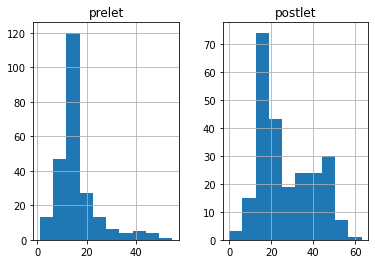

In [19]:
data.hist(column = ["prelet", "postlet"])

In [ ]:
#figure out a way to plot a histogram of only the kids who actually watched sesame street

In [37]:
data.regular

0      0
1      1
2      1
3      0
4      1
      ..
235    1
236    1
237    1
238    1
239    1
Name: regular, Length: 240, dtype: int64

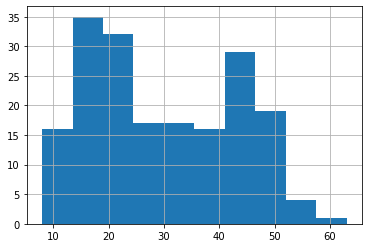

In [51]:
children_who_watched_regularly = (data.regular == 1)
data.postlet[children_who_watched_regularly].hist()

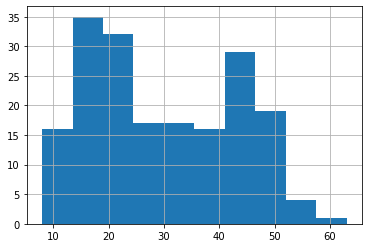

In [35]:
data.postlet[~children_who_watched_regularly].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac9cb9a2d0>,
      dtype=object)

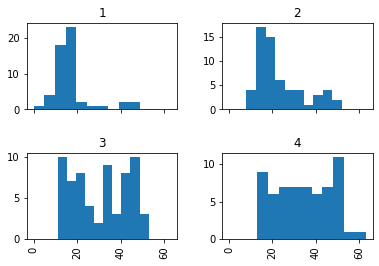

In [40]:
data.hist(column = "postlet", by = "viewcat", sharex = True)

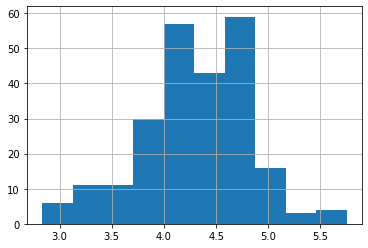

In [41]:
data.age.hist()

(17.356643356643357, 13.845360824742269, 6.889515292253826)

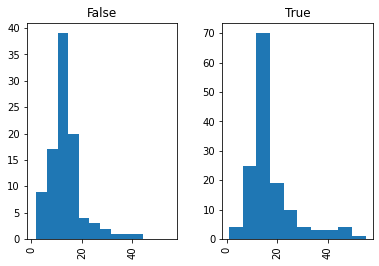

In [44]:
older = data.age > 4.2
data.hist(column = "prelet", by = older, sharex = True)
data.prelet[older].mean(), data.prelet[~older].mean(), data.prelet[~older].std()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facb90f88d0>,
      dtype=object)

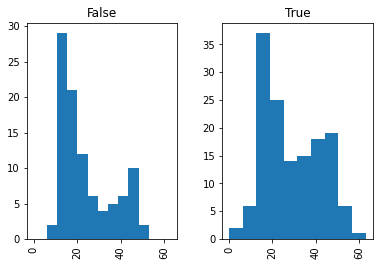

In [45]:
data.hist(column = "postlet", by = older, sharex = True)

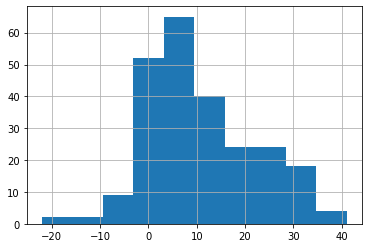

In [47]:
data['difflet'] = data.postlet - data.prelet
data.difflet.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac9de33690>,
      dtype=object)

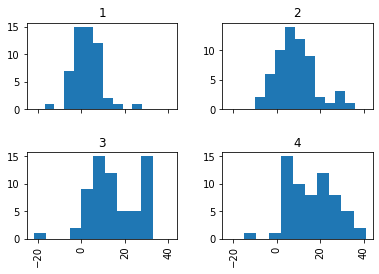

In [48]:
data.hist(column = "difflet", by = "viewcat", sharex = True)

(14.0, 12.066666666666666)

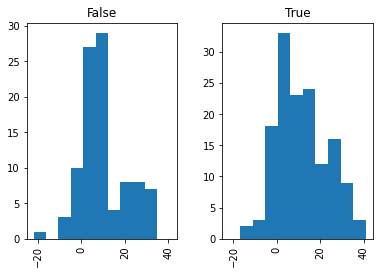

In [52]:
children_who_watched_regularly = (data.regular == 1)
data.hist(column = "difflet", by = older, sharex = True)
data.difflet[older][children_who_watched_regularly].mean(), data.difflet[~older][children_who_watched_regularly].mean()